Цель проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость, что бы на ранней сдадии выявлять студентов, находящихся в группе риска.

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

#Data exploration
df = pd.read_csv('stud_math.csv')
%matplotlib inline

In [2]:
def replace_nan(column):
    ''' заменяет значения NaN на None в строках колонки column
    '''
    df[column] = df[column].apply(lambda x: None if pd.isna(x) else x)

In [3]:
def print_hist(column):
    ''' Заменяет значения NaN на None в строках колонки column.
        Выводит гистограму по столбцк column.
    '''
    df[column] = df[column].apply(lambda x: None if pd.isna(x) else x)
    df[column].plot(kind = 'hist', grid = True, title = column)

In [4]:
def display_object(column):
    ''' Заменяет значения NaN на None в строках колонки column.
        Выводит количество уникальных значений в column и краткую сводку.
    '''
    df[column] = df[column].apply(lambda x: None if pd.isna(x) else x)
    display(pd.DataFrame(df[column].value_counts()))
    df.loc[:, [column]].info()

In [5]:
def get_boxplot(column):
    '''Построение box-plot графика из столбца column
    '''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [6]:
def get_stat_dif(column):
    '''Тест Стьюдента колонки Column
    '''
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [7]:
display(df.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [8]:
# так как необходимо отследить влияние на успеваемость, удаляем строки имеющие пропуски в столюце score из датасета
df = df.dropna(subset=['score'], axis=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

И так у нас 13 числовых переменных и 17 категориальных. И много пропущенных значений!

# school

In [10]:
display_object('school')

,school
GP,344
MS,45


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого у нас 2 уникальных значений и нет пропусков.

# sex

In [11]:
display_object('sex')

,sex
F,204
M,185


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     389 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого у нас нет пропусков. Девочек немного больше чем мальчиков.

# age

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

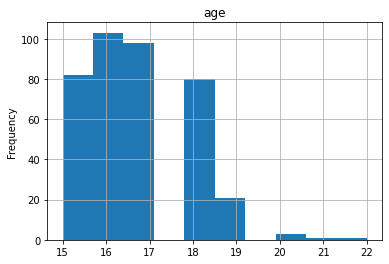

In [12]:
print_hist('age')
df.age.describe()

Наблюдается что возвраст участников наблюдения в среднем 16 лет, в основном это ученики в возрасте от 15 до 18 лет, но встречаются еденичные случаи учеников в возрасте от 20 до 22 лет. Так же в наблюдении нет учеников 17 лет. Ученик с возврастом 22 года, является выбросом, но так 22 года входит в пределы потенциальных характеристик, оставляем это наблюдение.

# address

In [13]:
display_object('address')

,address
U,291
R,83


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 15 строк в которых тип адреса не указан. Заполнить пропуски не предоставляется возможным, так как нет зависимости для определения подходящего значения. Учеников живущих в городе гараздо больше чем за городом.

# famsize

In [14]:
display_object('famsize')

,famsize
GT3,255
LE3,107


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 27 пусых строк в кторых размер семьи неуказан. Заполнить пропуски не предоставляется возможным, из за отсутствия данных.

# Pstatus

In [15]:
display_object('Pstatus')

,Pstatus
T,308
A,36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  344 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 45 пусых строк в кторых статус родителей не указан. Заполнить пропуски не предоставляется возможным, из за отсутствия данных.

# Medu

count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

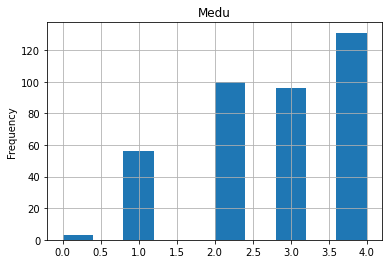

In [16]:
print_hist('Medu')
df.Medu.describe()

Как видно из этого признака, распределение смещено влево, выбросов нет. Большинство матерей имеет образование, преимущественно среднеспециального или 11 классов.

# Fedu

count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

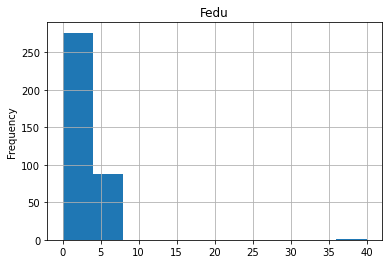

In [17]:
print_hist('Fedu')
df.Fedu.describe()

Как видно из этого признака, оно имеет один выброс со значением 40, скорее всего это ошибка в заполнении данных, заполняющий не пропечатал разделительнют точку. Имправим это:

count    365.000000
mean       2.528767
std        1.088082
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

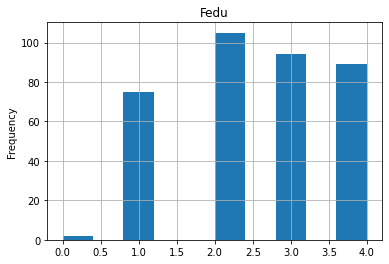

In [18]:
df.Fedu = df.Fedu.apply(lambda x: 4.0 if x == 40 else x)
print_hist('Fedu')
df.Fedu.describe()

Как видно из этого признака, распределение смещено в сторону среднеспециального или 11 классов. Большинство отцов имеет образование, преимущественно 5-9 классов.

# Mjob

In [19]:
display_object('Mjob')

,Mjob
other,127
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    370 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 5 уникальных наблюдения и 19 пусых строк в кторых работа матери не указана. Заполнить пропуски не предоставляется возможным, так как мы не можем с точной уверенностью отнести пропуски к той или иной категории. Так же можем наблюдать что 58 матерей являются безработными.

# Fjob

In [20]:
display_object('Fjob')

,Fjob
other,194
services,99
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 5 уникальных наблюдения и 36 пусых строк в кторых работа отца не указана. Заполнить пропуски не предоставляется возможным, так как мы не можем с точной уверенностью отнести пропуски к той или иной категории. Безработных отцов гараздо меньше чем матерей.

# reason

In [21]:
display_object('reason')

,reason
course,135
reputation,102
home,101
other,34


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  372 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 4 уникальных наблюдения и 17 пусых строк в кторых причина выбора школы не указано. Заполнить пропуски не предоставляется возможным, так как мы не можем с точной уверенностью отнести пропуски к той или иной категории. Большинство учеников выбрала школу из-за образовательной программы, но так же много из-за близости или репутыции школы.

# guardian

In [22]:
display_object('guardian')

,guardian
mother,248
father,86
other,24


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  358 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 3 уникальных наблюдения и 31 пусых строк в кторых причина выбора школы не указано. Заполнить пропуски не предоставляется возможным, так как мы не можем с точной уверенностью отнести пропуски к той или иной категории.

# traveltime

count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

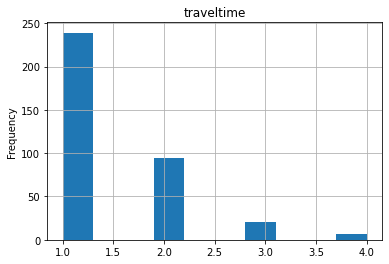

In [23]:
print_hist('traveltime')
df.traveltime.describe()

Как видно из этого признака, рапределение имеет выбросы, в виде числа 4. Но так как оно соответствует характеристикам распределения вы его оставляем.

# studytime

count    382.000000
mean       2.036649
std        0.847239
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

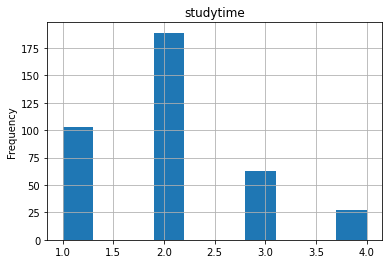

In [24]:
print_hist('studytime')
df.studytime.describe()

Как видно из этого признака, рапределение имеет выбросы, в виде числа 4. Но так как оно соответствует характеристикам распределения вы его оставляем.

# failures

count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

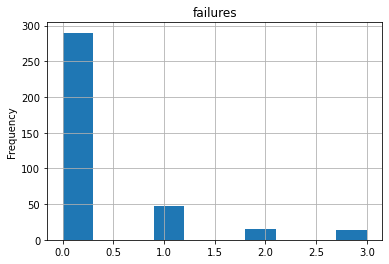

In [25]:
print_hist('failures')
df.failures.describe()

Как видно, у этого распределения сильные выбросы. Но так как нам известны потонциальные характеристики распределения, оставляем их.

# schoolsup

In [26]:
display_object('schoolsup')

,schoolsup
no,331
yes,49


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  380 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 9 пусых строк. Большая часть учащихся не имело дополнительной образовательной поддержки.

# famsup

In [27]:
display_object('famsup')

,famsup
yes,216
no,135


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  351 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 38 пусых строк. Большая часть учащихся имеют семейную образовательную поддержку.

# paid

In [28]:
display_object('paid')

,paid
no,197
yes,153


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    350 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 39 пусых строк. Большая часть учащихся имеют дополнительные платные занятия по математике.

# activities

In [29]:
display_object('activities')

,activities
yes,192
no,183


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  375 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 14 пусых строк. У большей половины учеников есть дополнительные внеучебные занятия.

# nursery

In [30]:
display_object('nursery')

,nursery
yes,297
no,77


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 13 пусых строк. Большинство учеников посещали детский сад.

# higher

In [31]:
display_object('higher')

,higher
yes,350
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  369 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 20 пусых строк. Наблюдается что 19 учеников не желают получать высшее образование, что может повлиять на оценки.

# internet

In [32]:
display_object('internet')

,internet
yes,300
no,55


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  355 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 34 пусых строк. У 55 учеников нету интернета в доме, что может как положительно так и отрицательно повлиять на успеваемость.

# romantic

In [33]:
display_object('romantic')

,romantic
no,235
yes,123


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  358 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


Итого 2 уникальных наблюдения и 31 пусых строк. Видно что 123 ученика состоят в романтических отношениях, что может отрицательно повлиять на их успеваемость в школе.

# famrel

count    362.000000
mean       3.930939
std        0.931554
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

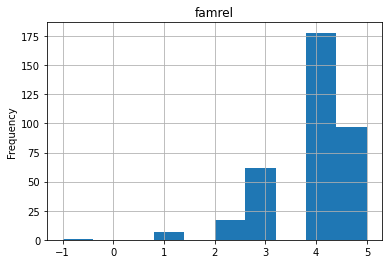

In [34]:
print_hist('famrel')
df.famrel.describe()

 В данном распределении видны выбросы, и некорректно заполненные числа. Так как выбросы не выходят за рамки распределения, учитываем из в анализе, а некорректно заполненные данные удаляем.

count    361.000000
mean       3.944598
std        0.895811
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

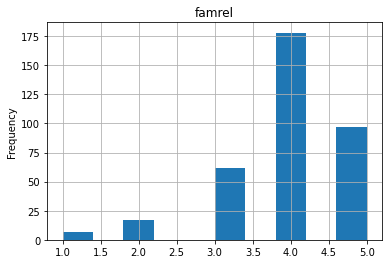

In [35]:
df.famrel = df.famrel.apply(lambda x: None if x == -1.0 else x)
print_hist('famrel')
df.famrel.describe()

Как мы видим большинство наблюдений расположено между 3 и 5.

# freetime

count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

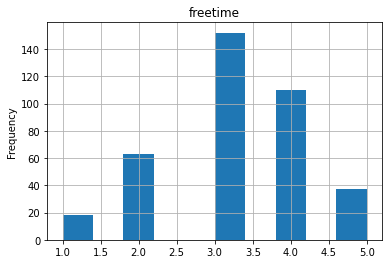

In [36]:
print_hist('freetime')
df.freetime.describe()

Данное распределение говорит что у учащихся есть достаточно свободного времени после школы. Имеются выбросы, но входящие в область наблюдения.

# goout

count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

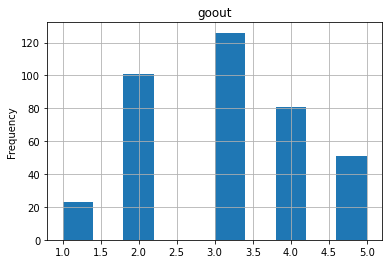

In [37]:
print_hist('goout')
df.goout.describe()

Распределение содержит средние показатели, и не имеет выбросов.

# health

count    374.000000
mean       3.529412
std        1.402006
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

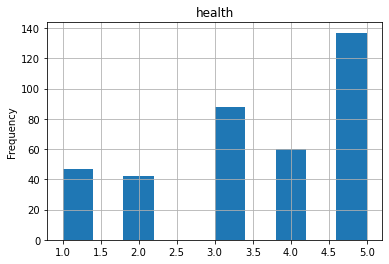

In [38]:
print_hist('health')
df.health.describe()

Распределение смещено влево. Выбросов нет.

# absences

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

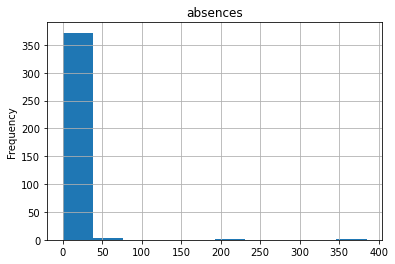

In [39]:
print_hist('absences')
df.absences.describe()

Распределение имеет явновыраженную аномалию в завишении показателей. Отфильтруем выбросы:

25-й квартиль: 0.0, 75-й квартиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


count    361.000000
mean       4.609418
std        4.989413
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

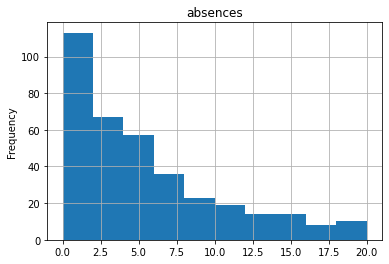

In [40]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)

print(
    '25-й квартиль: {},'.format(perc25),
    '75-й квартиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

df = df.loc[df.absences <= (perc75 + 1.5*IQR)]
print_hist('absences')
df.absences.describe()

Очевидно в сборе данных произошла ошибка, отбросив значения выше граници, мы получили ,боле правдивые числа, хотя они все еще имеют выбросы.

# Корреляционный анализ

In [41]:
correlation = df.corr()

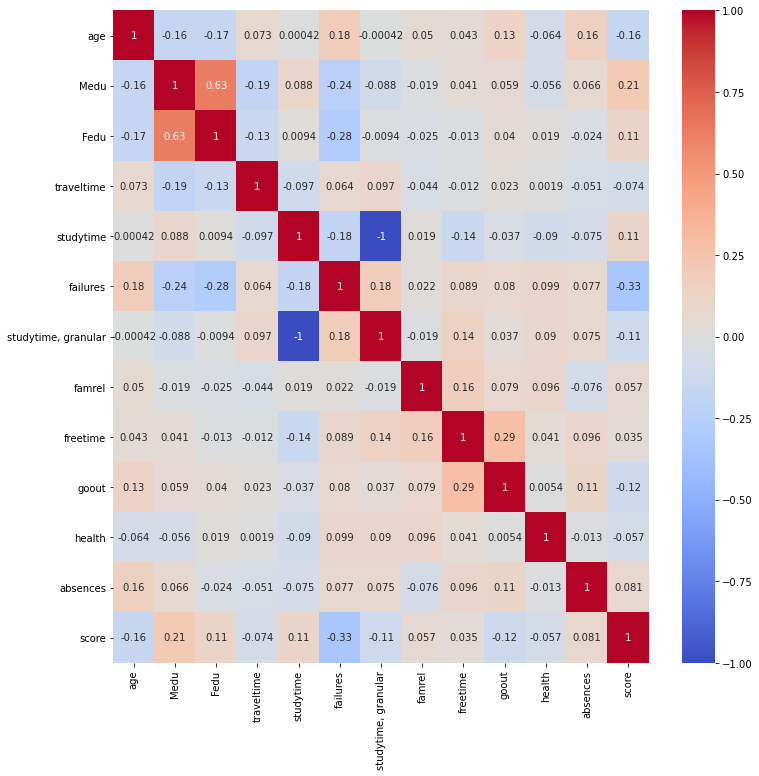

In [42]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(12, 12)

Из корреляции переменных видно, что Medu и Fedu очень скоррелированны очень сильно, что говорит о том, что зачастую образуются пары со схожим уровнем знаний. Так же эти переменные, видимо как пример для своих детей или возможноть помочь решить задание, больше всего влияют на успеваемость по матиматике.
Так же влияет на успеваемость studytime, что логично, больше занимаешься лучше знаешь материал.
Влияет так же на успеваемость absences, famrel и freetime.

# Анализ номинативных переменных

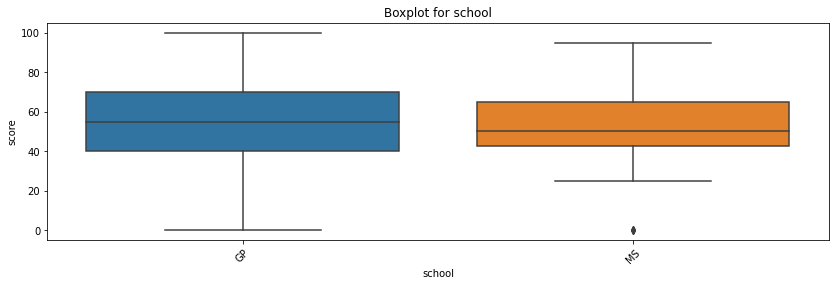

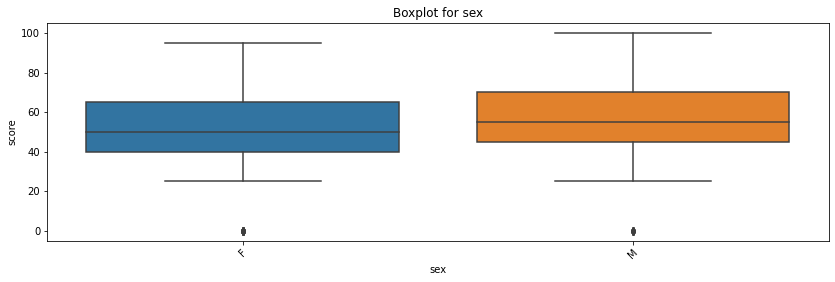

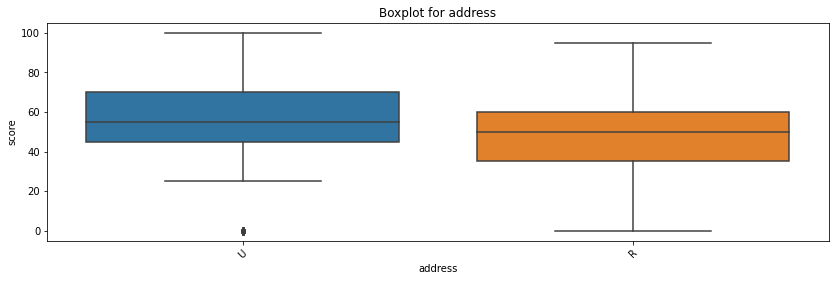

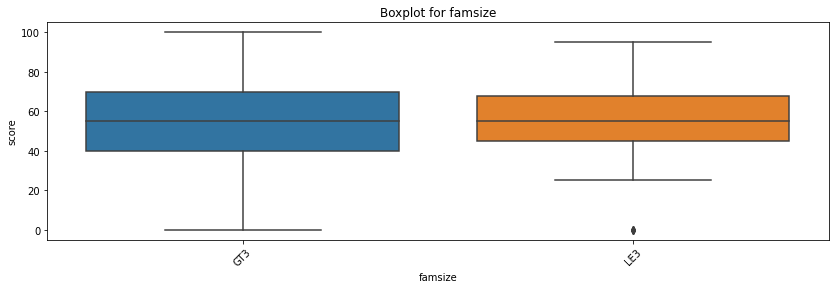

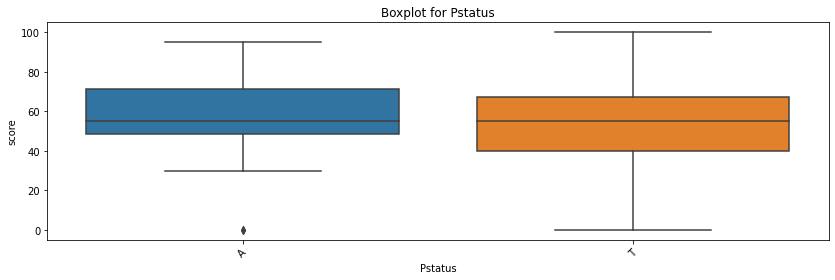

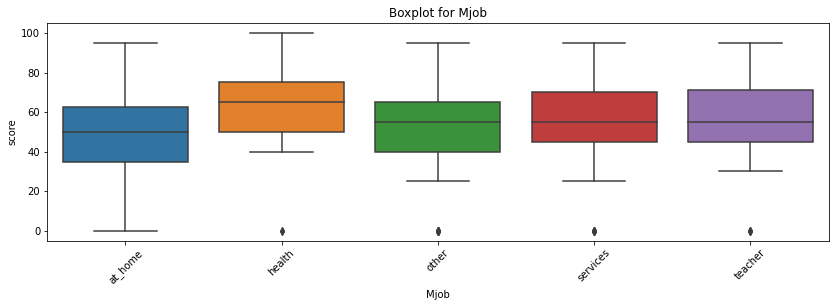

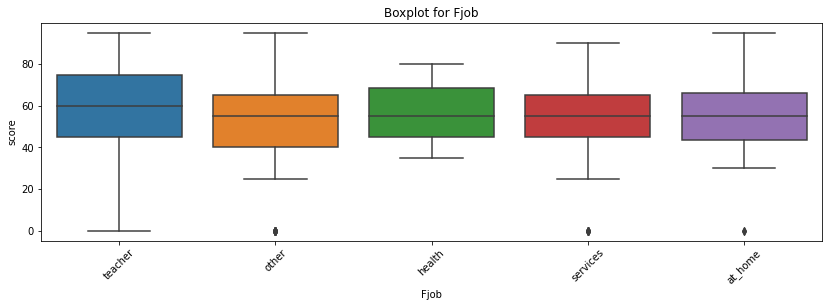

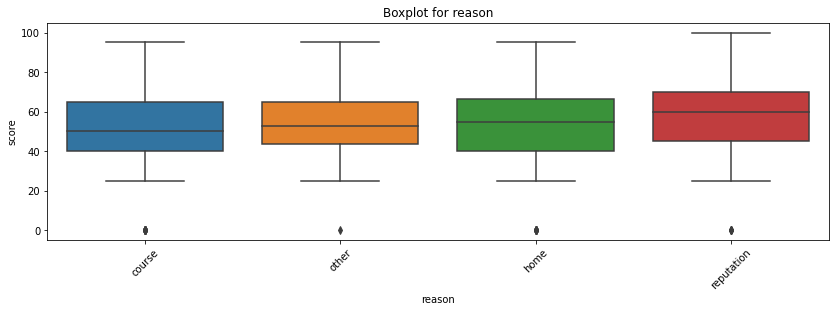

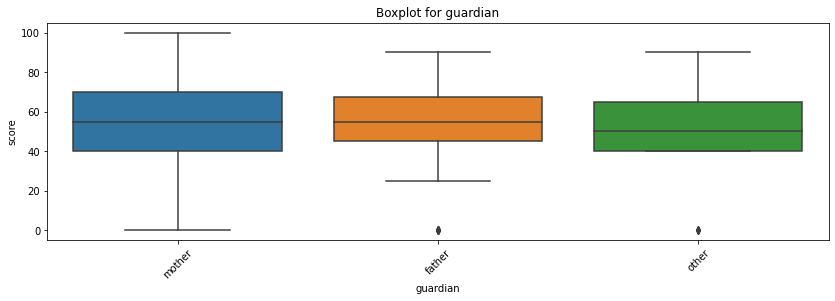

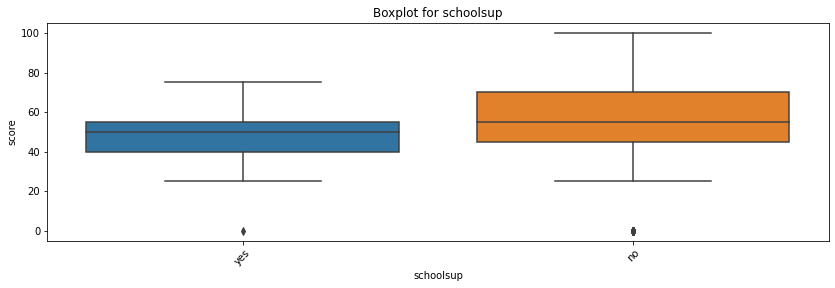

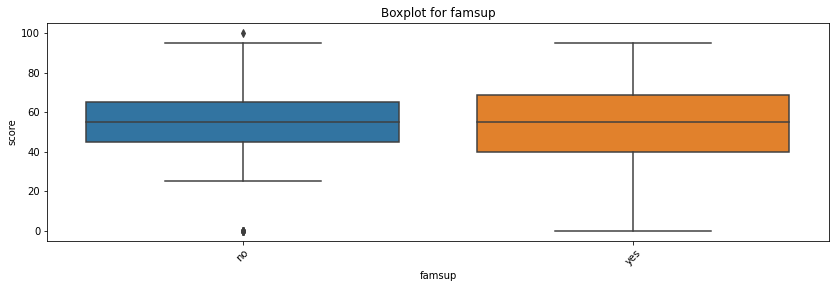

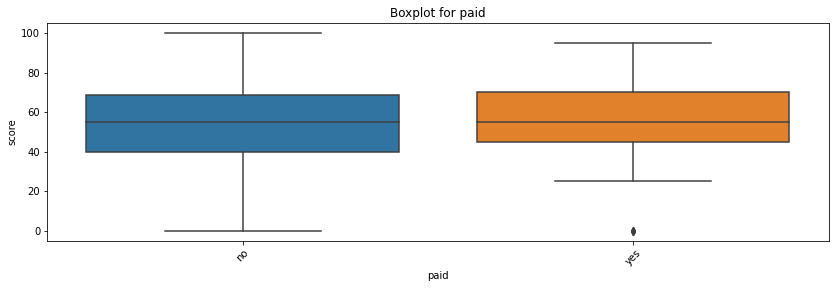

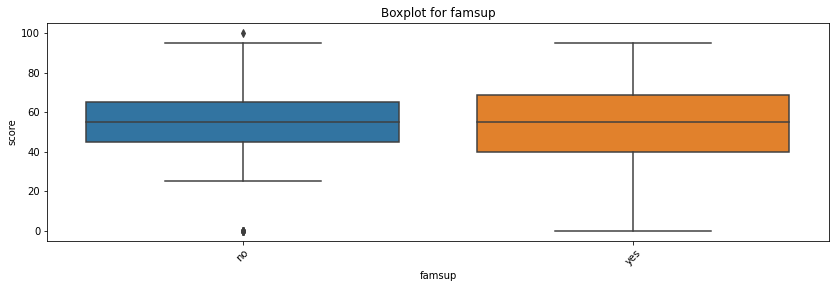

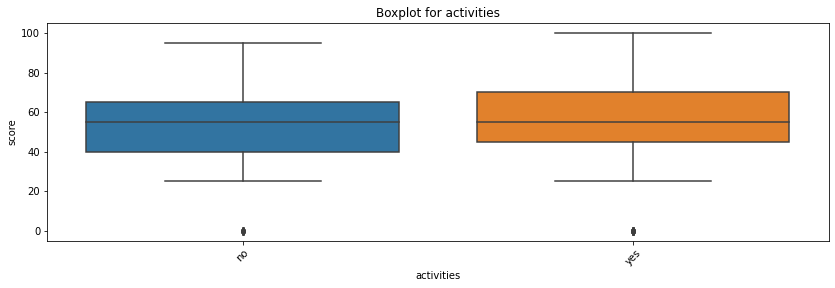

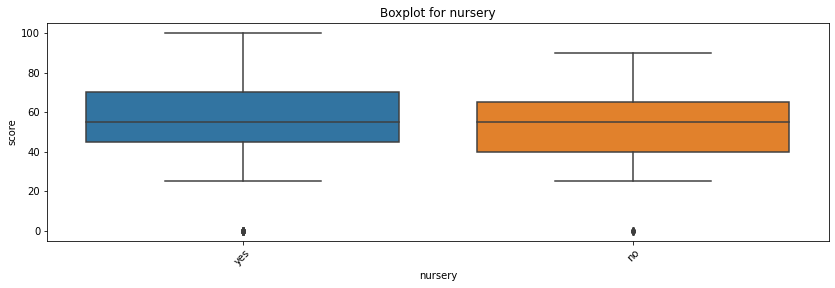

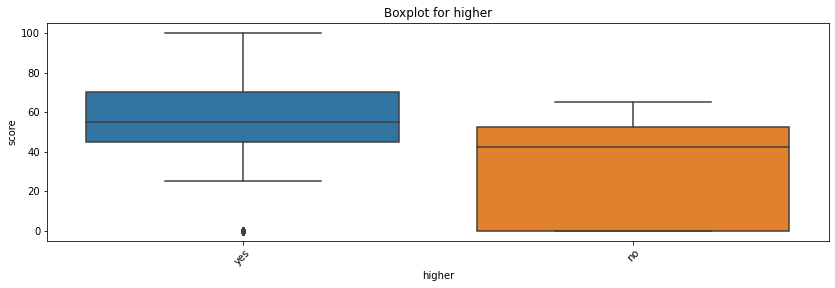

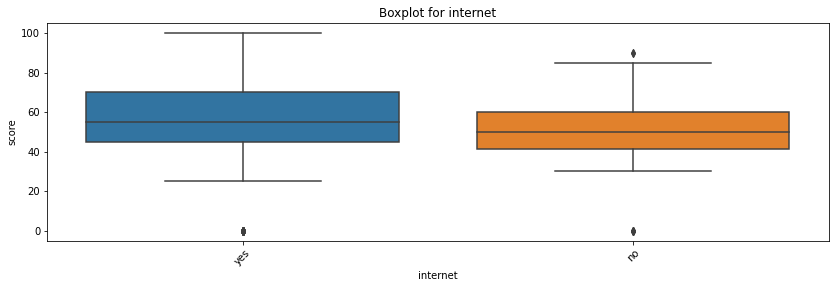

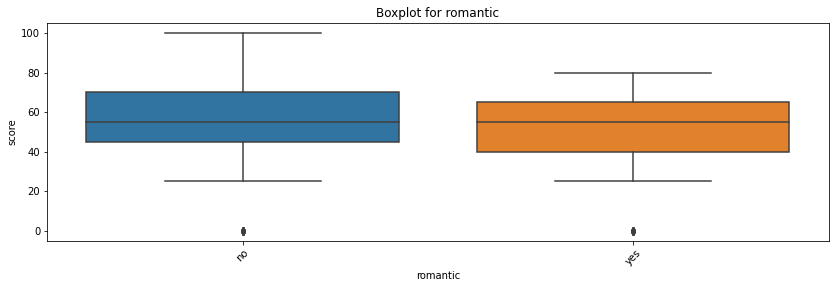

In [43]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'famsup',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что все параметры могут повлиять на успеваемость учеников.

Проверим есть ли статическая разница в распрелелееии успеваемости учеников с помощью теста Стьюдента.

In [44]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'famsup',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Из теста видно, серьезно отличаются шесть параметров: sex, address, Mjob, paid, higher, romantic. Оставим эти переменные в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на успеваемость по математике, это: sex, address, Mjob, paid, higher, romantic, Medu, Fedu, studytime.

In [45]:
df_for_model = df.loc[:, ['sex', 'address', 'Mjob', 'paid', 'higher',
                          'romantic', 'Medu', 'Fedu', 'studytime']]
df_for_model.head()

,sex,address,Mjob,paid,higher,romantic,Medu,Fedu,studytime
0,F,U,at_home,no,yes,no,4.0,4.0,2.0
1,F,U,at_home,no,yes,no,1.0,1.0,2.0
2,F,U,at_home,None,yes,None,1.0,1.0,2.0
3,F,U,health,yes,yes,yes,4.0,2.0,3.0
4,F,U,other,yes,yes,no,3.0,3.0,2.0


# Выводы

Итак, в результате EDA для анализа условий жизни учащихся на их успеваемость по математике были получены следующие выводы:

В данных достаточно много пустых значений, только столбцы school, sex и age были заполнены полностью.
Часто в данных попадаются выбросы данных, но больнство данных соответствуют условию итих данных, и они достаточно чисты.
Положительная корреляция параметра Medu, Fedu и studytime может говорить о том, что влияние образования их родителей и время уделенное на обучение вне школы влияет на успеваемость по математике. 
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, Mjob, paid, higher, romantic, Medu, Fedu  и studytime.
Так же в построении модели можно обратить внимание на такие параметры как absences, famrel и freetime, которые так же могут повлиять на успеваемость.
В данных об оценках так же присутствует множество нулевых значений, которые могли повлиять на результаты анализа, но я оставил их для анализа, так как мы не можем с точно утверждать что это ошибка в заполнении данных, а не неудача на экзамене или не допуск до него.

По завершению проекта. Хочу сказать, что все же не успел изучить анализ. Если есть возможность посмотреть на ноутбук олично выполненной работы, я бы на него посмотрел.